It is a very common DS. But we have already seen graphs like Trees, Linked List etc are subclasses of graphs. In general graphs are defined as a bunch of vertices and edges connecting them.


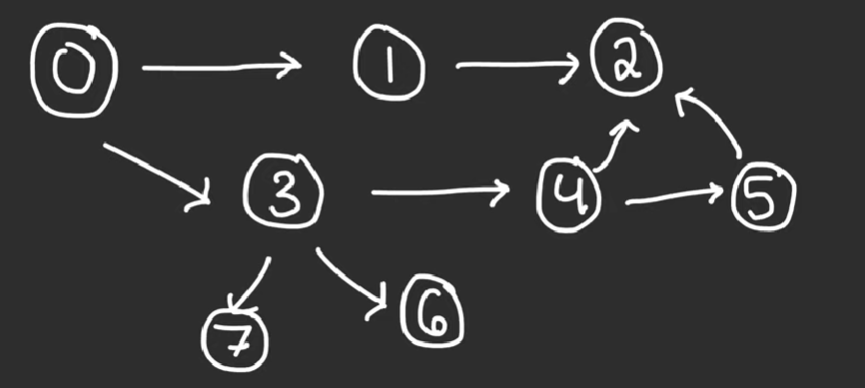

Vertices is common in mathematics in cs we mostly refer to them as nodes. As you can see if you take 0->1->2 subgraph you get a linked list similarly if you take 3->7->6 then you get a subgraph called tree.

Another imp terminology is that graphs can be undirected (you can both direction) or directed (like in given example you can only go from 1->2 never 2->1). Another important property is called cycle in graph which basically means that there is a cycle in graph (these are difficult to deal with bs itna hi sir ne bola hai).

There can be multiple ways to store a graph but most common way is using edge list
You will be given mostly in the question that whether it is directed or undirected along with that each element in edge list is [From, To].
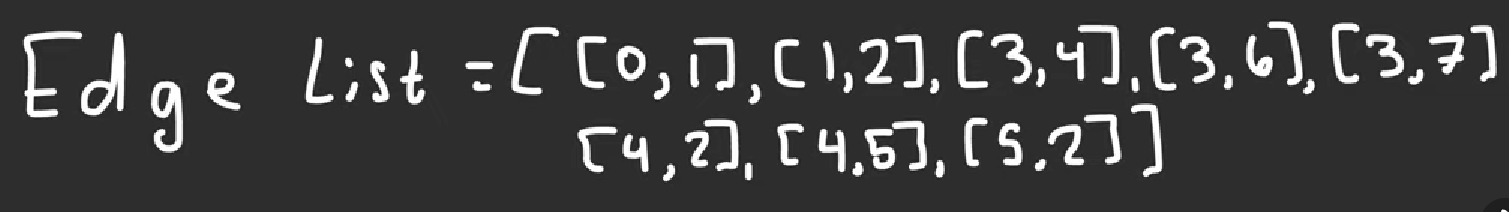

Now working with Edge list is irritation because usually in cs what we are really intrested in is that if you are on say node 3 then from here where can you go? we are rarely intrested in graph as a whole. This gives rise to Adjacency Matrix which is a 2D list 
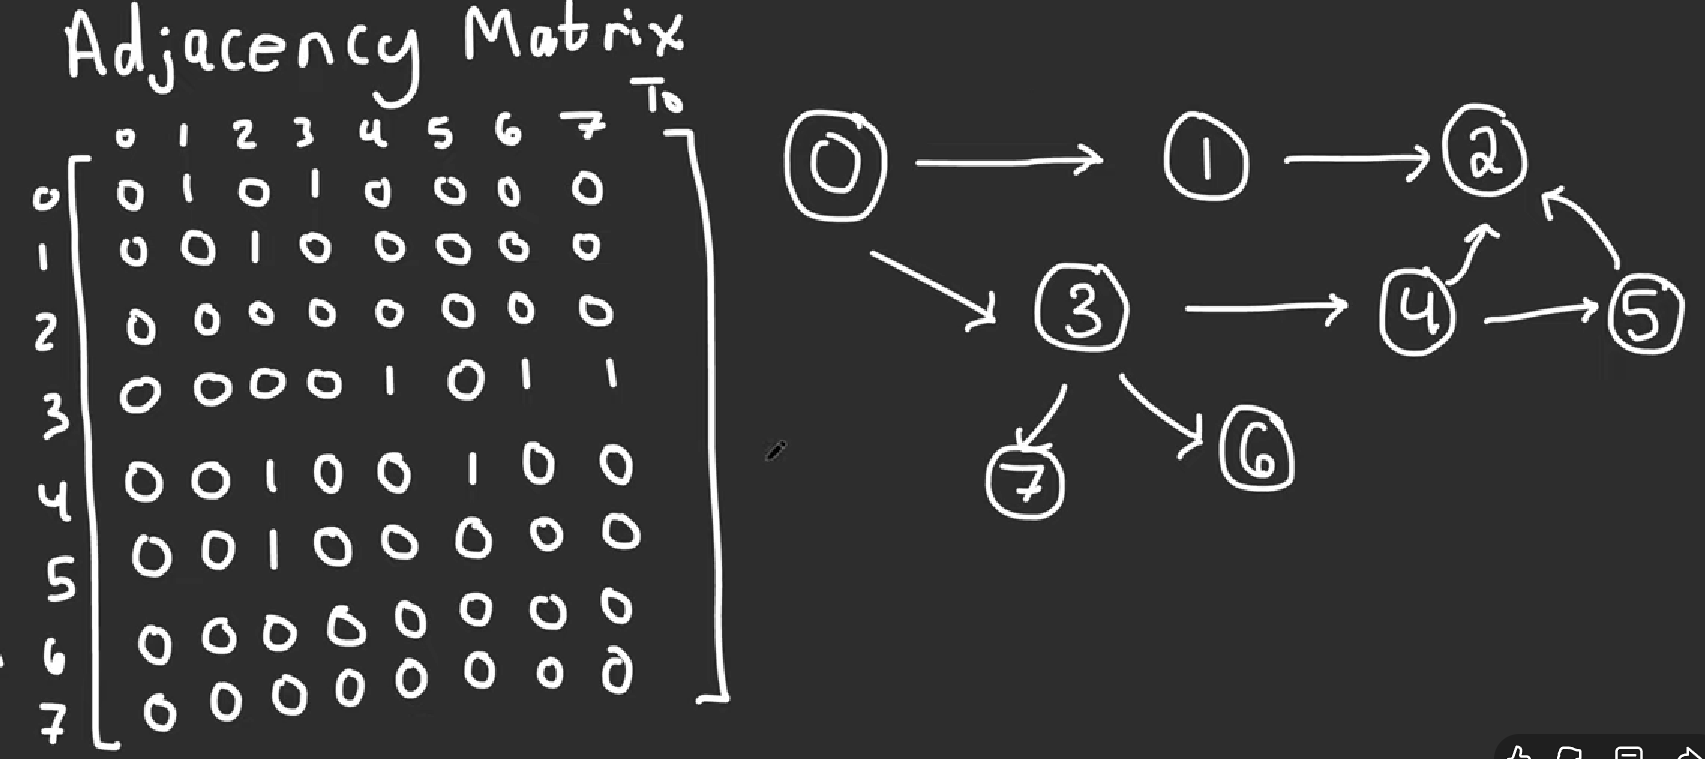

As you can see in adjacency Matrix you have a problem of unnecesary space like from 7 you cannot go anywhere but you will have to loop through it entirely to know that which is inefficient instead we could have something like [] denoting empty list then it would be much better. To solve this we have Adjacency List.

First thing you will notice is that it has curly braces which means its a hashmap where key is the node's value and its value is nothing but the list of all connections that it has.
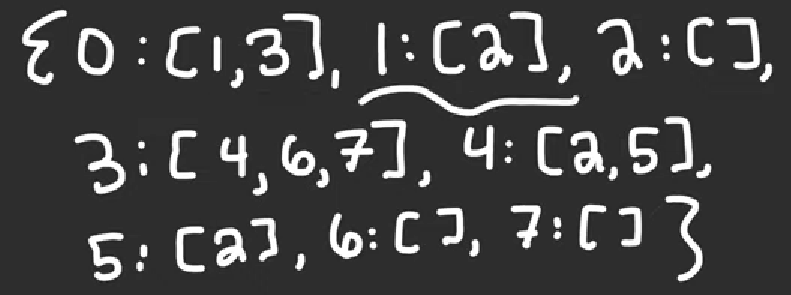

There is one more way we might work with graphs via class.
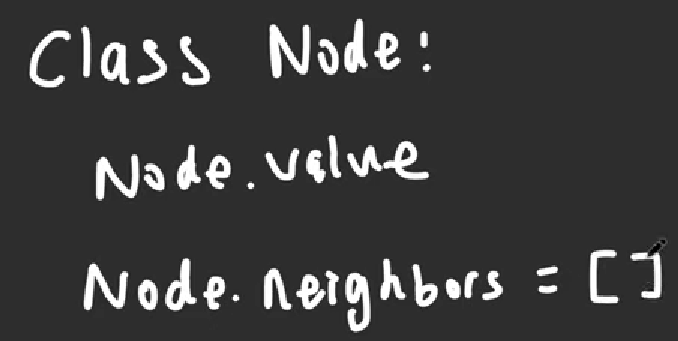

Now generally in graphs we traverse them there can be multiple ways let's start with DFS. Here we usually go in deapth in one direction then backtrack to prev nodes then again go in deapth for that node as well. We keep a hashset seen() to keep track of what node's we have seen already. This seen set also helps us to avoid cycle loops. By following this approach we will have a Recurssive DFS which usses a call stack.
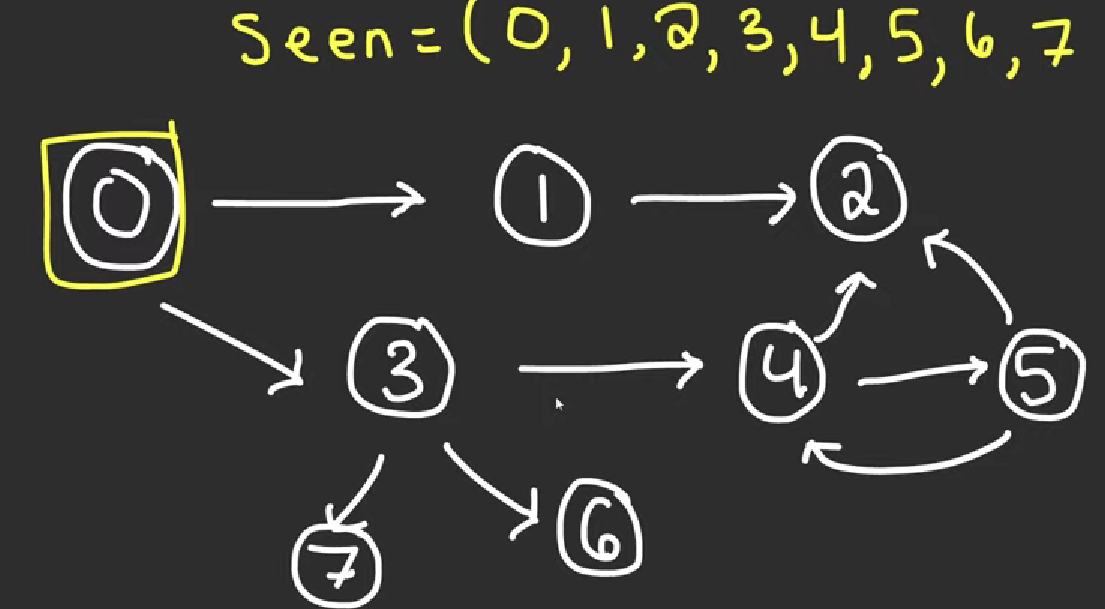

You can also have a iterative approach to solve this in which you will use a literall stack and loops instead of recurssion. What you would do is initialize a stack [] with where you are starting from called source and while you have stack (means something in it) so like in given example you start with [0] then put whatever 0 is connected with [1, 3] then pop 3 and put whatever 3 is connected with like [1, 7, 8, 4] and soon. Similarly build the seen hashset() as well of nodes that are visited.
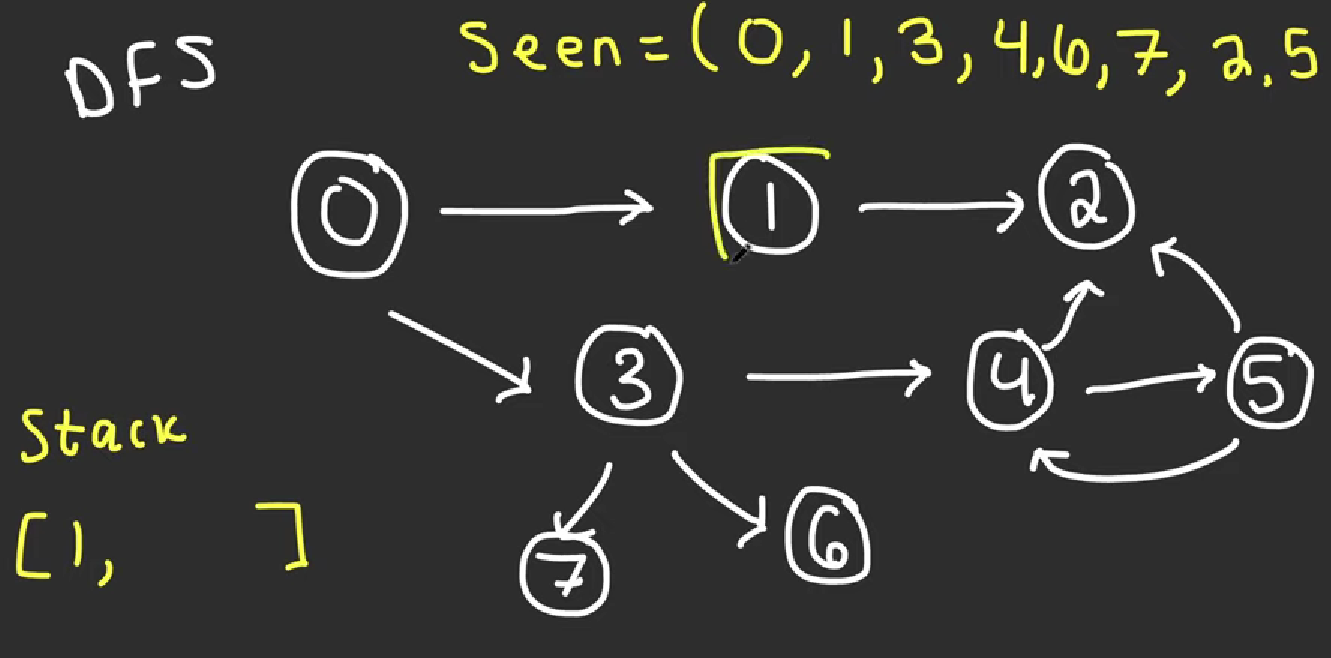

Now another approach for traversing is BFS which usses a Queue instead of stack. You start with a queue initialized with your starting node [0] then when we pop it off we add its neighbours [1,3] now as this is a queue you will delete 1 first and add 1's neighbours which is 2. [3, 2] then keep doing till there is something in queue. Both dfs and bfs uses a seen hashmap. So difference between BFS and DFS is just which data structure you use to store your frontiers.
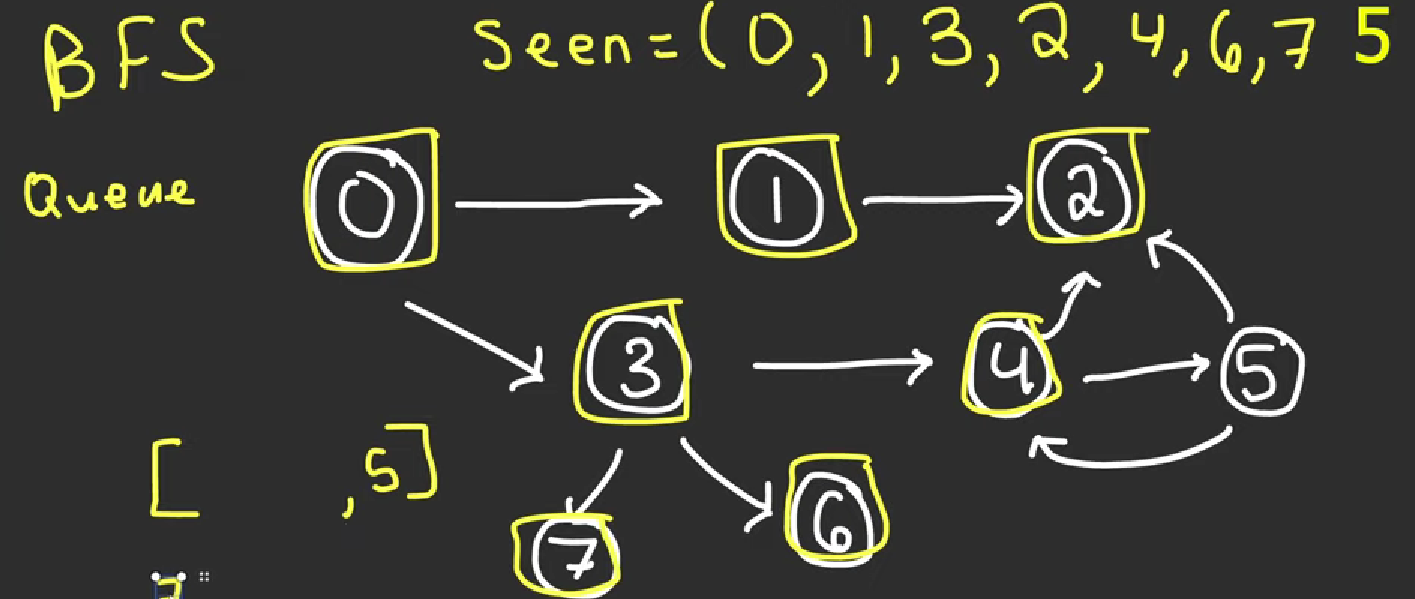

Now let's study how we give back time and space complexity for graphs. We use V and E for denoting Vertex and Edges. You might have seen someone saying O(V.E) which means that for all the vertex in graphs you are visiting all the edges in graph. Ofc we are not doing that in BFS and DFS. In both dfs and bfs what we are doing is that we are seeing for each node only its neighbours only so even though we take care of all the edges and vertex but a time we process only a particular set of those and we don't repeat what's already been selected. So this is written in CS as O(V + E). Again also in space complexity we are storing All the vertex and edges if we store using a Ajacency List which is most common. So its complexity can be written as O(V + E). Therefore both time and space complexity for BFS and DFS will be O(V+E)

Trees if we wanna talk in terms of graphs then we can say that trees are "connected, acyclic and undirected graphs". By connected means that from any node you can go to any node. In particular always rememeber that if you have a tree then for N Vertices you will have exactly N-1 Edjest. Why? becase if you even N edges then you might have a cycle and there can be multiple ways to reach a node from a given node which breaks the defination of a tree. Similarly if you have way too less edges than N-1 then there can be nodes that are not connnected at all. Therefore rem N V then N-1 E.

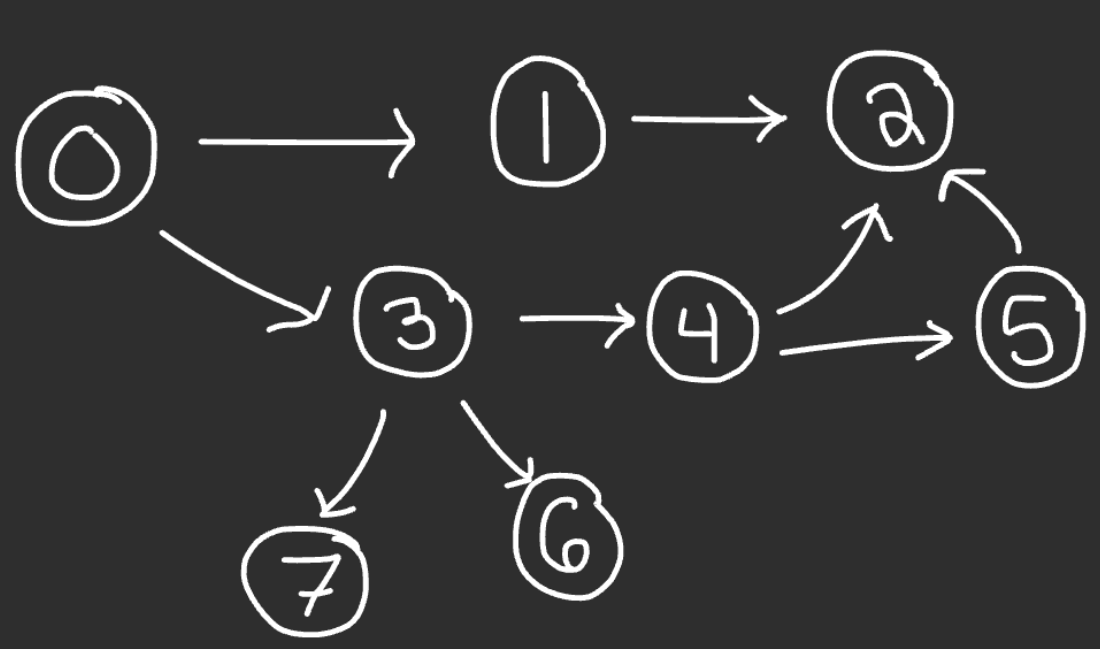

In [1]:
# Array of Edges (Directed) [Start, End]
n = 8
A = [[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]

A

[[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]

In [2]:
# Convert Array of Edges -> Adjacency Matrix

M = []
for i in range(n):
  M.append([0] * n)

for u, v in A:
  M[u][v] = 1

  # Uncomment the following line if the graph is undirected
  # M[v][u] = 1

M

[[0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [3]:
# Convert Array of Edges -> Adjacency List
from collections import defaultdict

D = defaultdict(list)

for u, v in A:
  D[u].append(v)
  # Uncomment the following line if the graph is undirected
  # D[v].append(u)

D

defaultdict(list, {0: [1, 3], 1: [2], 3: [4, 6, 7], 4: [2, 5], 5: [2]})

In [4]:
D[3]

[4, 6, 7]

In [5]:
# DFS with Recursion - O(V + E) where V is the number of nodes and E is the number of edges

def dfs_recursive(node):
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen:
      seen.add(nei_node)
      dfs_recursive(nei_node)

source = 0
seen = set()
seen.add(source)
dfs_recursive(source)

0
1
2
3
4
5
6
7


In [6]:
# Iterative DFS with Stack - O(V + E)

source = 0

seen = set()
seen.add(source)
stack = [source]

while stack:
  node = stack.pop()
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen:
      seen.add(nei_node)
      stack.append(nei_node)

0
3
7
6
4
5
2
1


In [7]:
# BFS (Queue) - O(V + E)

source = 0

from collections import deque

seen = set()
seen.add(source)
q = deque()
q.append(source)

while q:
  node = q.popleft()
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen:
      seen.add(nei_node)
      q.append(nei_node)

0
1
3
2
4
6
7
5


In [8]:
class Node:
  def __init__(self, value):
    self.value = value
    self.neighbors = []

  def __str__(self):
    return f'Node({self.value})'

  def display(self):
    connections = [node.value for node in self.neighbors]
    return f'{self.value} is connected to: {connections}'

A = Node('A')
B = Node('B')
C = Node('C')
D = Node('D')

A.neighbors.append(B)
B.neighbors.append(A)

C.neighbors.append(D)
D.neighbors.append(C)

B.display()

"B is connected to: ['A']"